# Calculus Foundations 🍎🌳
---

<center><img src="https://media1.tenor.com/images/6cb50d6bbc337620d20d0ec0b002b1f4/tenor.gif?itemid=17109116"></center>

<a id=contents></a>


# Contents
---


### Chapter 1: [Velocity and Slope](#preamble)

* Slope function

* Instantaenous velocity


### Chapter 2: [Limits](#limits)

* Definitions of the limit

* Operations with limits

---

Materials primarily based on [**Paul's Online Notes**](https://tutorial.math.lamar.edu/Classes/CalcI/CalcI.aspx) for Calculus I.

In [1]:
import numpy as np
import sympy as sp

import ipywidgets as wg
import time

import matplotlib.pyplot as plt
%matplotlib inline

# !curl https://raw.githubusercontent.com/websitenotavailable/learning/master/L-3_Math/learnmath.py -o ./learnmath.py
from learnmath import *

In [2]:
# the tortoise and the hare

tortoise = lambda t: 100 * t
hare = lambda t: 450 * ((t - 5)/5)**9 + 450

def plot_race(p=1.0):

    tlim=(0, 11)
    
    T = np.linspace(*tlim) * p

    plt.figure(figsize=(14, 8))

    pltfmt = dict(alpha=0.5, lw=5)

    t_prime = T[-1]

    # tortoise
    plt.plot(T, tortoise(T), label='Tortoise' , **pltfmt)
    plt.scatter(t_prime, tortoise(t_prime), **pltfmt)
    
    # hare
    plt.plot(T, hare(T), label='Hare', **pltfmt)
    plt.scatter(t_prime, hare(t_prime), **pltfmt)

    # finish line
    plt.hlines(1000, tlim[0], tlim[-1],
               ls='--', color='gray', **pltfmt)

    plt.legend(fontsize=18, loc=2)

    plt.ylim(-50, 1050)
    plt.xlim(-0.5, 10.5)

    
slider = wg.FloatSlider(value=0.0, min=0.0, max=1.0,
                        steps=0.01, description='Progress',
                        layout=wg.Layout(width='650px')
                       )
wg.interact(plot_race, p=slider)
plt.show()


button = wg.Button(description='Start Race')
display(button)

def start_race(b):
    for p in np.linspace(0, 1, 60):
        slider.value = p

button.on_click(start_race)

interactive(children=(FloatSlider(value=0.0, description='Progress', layout=Layout(width='650px'), max=1.0), O…

Button(description='Start Race', style=ButtonStyle())

<a id=preamble></a>


[**Back to Contents**](#contents)


# Chapter 1: Velocity and Slope


<center><img width=600 src="https://media.giphy.com/media/rAbzwHkXRiTYwiQIoG/giphy.gif"><\center>




<br>

## A Particle in Space 📏⚛
---

Imagine a particle falling in 1-D vertical space.


The position of the particle is determined by time $t$, given by the function:





Where:

*  $t$ is time in seconds, relative to an origin $t_0 = 0$ (beginning of observation), and

*  $f(t)$ is the position along the vertical space, relative to an origin, $f_0=0$  (the ground).

We can think of $t, f(t)$  as a cartesian coordinate relative to the origin $(0,0)$.



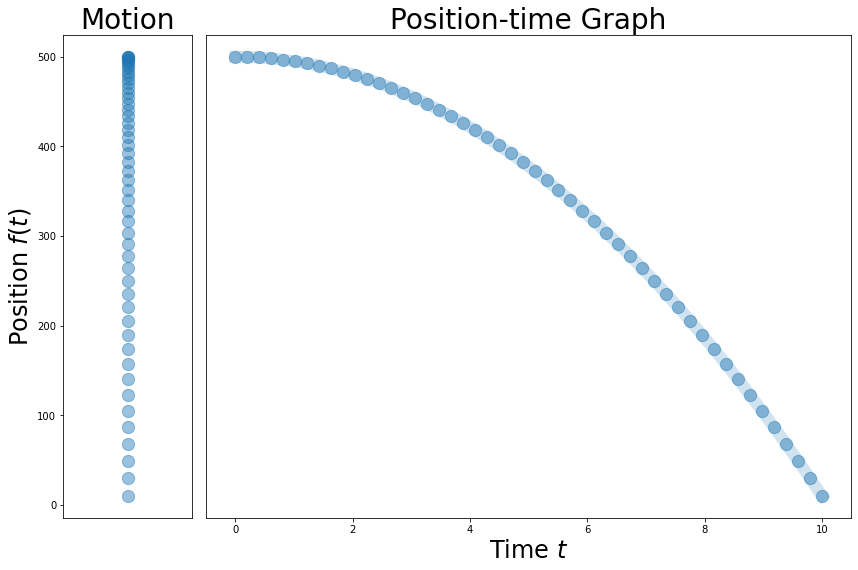



Each dot on the left graph shows the particle's position at equal increments of time.

As time goes on, the particle falls faster to the ground. But how fast does the particle travel at any point in time?

---


In [3]:
md('''

<br>

## A Particle in Space 📏⚛
---

Imagine a particle falling in 1-D vertical space.


The position of the particle is determined by time $t$, given by the function:

''')


# variable
t = sp.symbols('t')

# define position formula
f = lambda t: -4.9 * t**2 + 500

# render latex
Lx('f(t)', f(t)).show(center=True)


md('''

Where:

*  $t$ is time in seconds, relative to an origin $t_0 = 0$ (beginning of observation), and

*  $f(t)$ is the position along the vertical space, relative to an origin, $f_0=0$  (the ground).

We can think of $t, f(t)$  as a cartesian coordinate relative to the origin $(0,0)$.

''')


# Plot motion of particle
vspace()

# create linear time state-space
T = np.linspace(0, 10)

# plot position
fig, axes = plt.subplots(1, 2, figsize=(12, 8), 
                         gridspec_kw={'width_ratios': (1, 5)})

# common formatting arguments 
format_kw = dict(alpha=0.45, s=150)

# free fall
axes[0].scatter(np.zeros(T.shape), f(T),
                **format_kw)

axes[0].set_title('Motion', fontsize=28)
axes[0].set_ylabel('Position $f(t)$', fontsize=24)


# position graph
axes[1].scatter(T, f(T), **format_kw)
axes[1].plot(T, f(T), alpha=0.2, lw=12)

axes[1].set_title('Position-time Graph', fontsize=28)
axes[1].set_xlabel('Time $t$', fontsize=24)


# remove tick marks
axes[0].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout(pad=1)

plt.show()


md('''

Each dot on the left graph shows the particle's position at equal increments of time.

As time goes on, the particle falls faster to the ground. But how fast does the particle travel at any point in time?

---
''')

In [4]:
md(r'''

<br>

## Average Velocity and Slope ⏲🐌
---

**`Definition`** The `average velocity` $\bar{v}$ is the change in position over a change in time, given by:
''')

# \bar{v} = \frac{f(t') - f(t)}{t' - t} = \frac{\Delta f(t)}{\Delta t} = \frac{\text{Rise}}{\text{Run}}

md(r'''
where:
* $t$ denotes start (initial) time, and $t'$ final time,
* $\Delta t = t' - t$ is the change in time,
* $\Delta f(t) = f(t') - f(t) = f(t + \Delta t) - f(t)$ is the change in position, \
also called *displacement* (similar to distance).

We can think of $\bar{v}$ as a function of $t$ and $\Delta t$:

''')
# \bar{v}(t, \Delta t) = \frac{f(t + \Delta t) - f(t)}{\Delta t} \tag{0.1}

md(r'''
We can also think of $\bar{v}$ as the **`slope`** of a straight line that passes through two points with $(x, y)$
coordinates: $(t, f(t))$ and $(t + \Delta t, f(t + \Delta t))$.

We call this line the **secant** line connecting through the two points.

Recall the famous **slope-intercept form** of the linear function, which can describe any straight line on the xy-plane:
''')

# y = m x + b

md('with slope $m = \\frac{\Delta y}{\Delta x}$ and a constant intercept $b$.')

vspace()


# vector of time intervals
T = np.linspace(0, 10)
ΔT = np.linspace(5, 1e-5, 6)


# color map
cmap = plt.get_cmap('autumn')
    
# plot secant
def plot_secant(t, Δt):

    plt.figure(figsize=(12, 8))

    # plot position graph
    plt.plot(T, f(T), lw=5, alpha=0.75)

    # initial time marker
    plt.scatter(t, f(t), s=200, alpha=0.75, marker='X',
                    zorder=3, c=dcolors[3])

    plt.annotate(f'$t = {t:.2f}$', fontsize=20, va='center',
                 xy=(t+0.2, f(t)), xytext=(t + 1, f(t)),
                 arrowprops={'arrowstyle': '->', 'lw' : 2})

    # plot secant line

    # line color
    color = cmap((Δt - ΔT.min())/(ΔT.max() - ΔT.min()))

    # final time
    t_prime = t + Δt

    # final time marker
    plt.scatter(t_prime, f(t_prime), color=color, s=100, zorder=10)

    plt.annotate(f'$\Delta t = {Δt:.3f}$',
                 xy = (t_prime-0.2, f(t_prime)),
                 xytext = (t_prime-0.75, f(t_prime)),
                 arrowprops={'arrowstyle': '->', 'lw' : 2},
                 fontsize=16, ha='right', va='center')

    # slope (average velocity)
    m = (f(t+Δt) - f(t)) / Δt

    # intercept
    b = f(t) - m*t

    # plot secant
    plt.plot(T, m*T + b, lw=5, alpha=0.75, c=color,
             label= (f'$\Delta t = {Δt:.3f}$'
                     + ', $\\bar{v}' + f' = {m : .2f}$ m/s')
            )

    plt.legend(loc=1, bbox_to_anchor=(0.465, -0.1), fontsize=16)

    plt.title(r'Average Velocity and $\Delta t$', fontsize=24)

    plt.ylabel('Position $f(t)$', fontsize=18)
    plt.xlabel('Time $t$', fontsize=18)

    plt.ylim(f(T).min(), f(T).max() * 1.25)
    plt.xlim(T.min(), min((t + ΔT.max()) * 1.25, T.max()))

    plt.grid()

    plt.show()

t_slider = wg.FloatSlider(value=4, max=10, min=0, steps=0.1)
dt_slider = wg.FloatSlider(value=5, max=5, min=1e-5, steps=0.01)

wg.interact(plot_secant, t=t_slider, Δt=dt_slider)
plt.show()

button = wg.Button(description='Δt to 0')

display(button)

def to_zero(b):
    dt0 = dt_slider.value
    for Δt in np.linspace(dt0, 1e-5, 10):
        dt_slider.value = Δt

button.on_click(to_zero)



<br>

## Average Velocity and Slope ⏲🐌
---

**`Definition`** The `average velocity` $\bar{v}$ is the change in position over a change in time, given by:



where:
* $t$ denotes start (initial) time, and $t'$ final time,
* $\Delta t = t' - t$ is the change in time,
* $\Delta f(t) = f(t') - f(t) = f(t + \Delta t) - f(t)$ is the change in position, \
also called *displacement* (similar to distance).

We can think of $\bar{v}$ as a function of $t$ and $\Delta t$:




We can also think of $\bar{v}$ as the **`slope`** of a straight line that passes through two points with $(x, y)$
coordinates: $(t, f(t))$ and $(t + \Delta t, f(t + \Delta t))$.

We call this line the **secant** line connecting through the two points.

Recall the famous **slope-intercept form** of the linear function, which can describe any straight line on the xy-plane:


with slope $m = \frac{\Delta y}{\Delta x}$ and a constant intercept $b$.

interactive(children=(FloatSlider(value=4.0, description='t', max=10.0), FloatSlider(value=5.0, description='Δ…

Button(description='Δt to 0', style=ButtonStyle())

## Instantaneous Velocity 🧊💨
---

We want to find the instantenous velocity ($v$) of the particle by making the interval $\Delta t$ used to calculate average velocity smaller and smaller. But we **cannot** just make $\Delta t$ zero, since

$$
    \bar{v} = \frac{f(t+\Delta t) - f(t)}{\Delta t} \bigg\rvert_{\Delta t = 0} = \frac{0}{0} \,.
$$

However, we can "approximate" $v$ by making $\Delta t$ *arbitrarily close*<sup>1</sup> (but not equal) to 0.

$$
v = \frac{f(t+\Delta t) - f(t)}{\Delta t} \quad \text{as} \quad  \Delta t \to 0
$$

This is known as taking the *limit* of $\bar{v}$ as $\Delta t$ **approaches** 0.

**`Definition`**** The `instantaneous velocity` (or just velocity, for short) is given by taking the limit of the $\bar{v}(t, \Delta t)$ as $\Delta t$ approaches 0:

$$
v \equiv \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t} = \frac{df(t)}{dt}. \tag{0.2}
$$

The third term $\frac{df(t)}{dt}$ is one of the shorthands for writing this limit. In general, this limit is known as the *derivative* of the function $f(t)$ with respect to $t$ (in this case, the position). We can think of $v(t)$ as a function with one argument, $t$.

<br>

---

<sup>1</sup> some like to say "infinitely" or "infinitesimally" close.

<a id=limits></a>

---

[**Back to Contents**](#contents)

# Chapter 2: Limits

<center><img src="https://media.giphy.com/media/U2BASTIsaw8WQ/giphy.gif"></center>

## Definitions of Limits
---

**`Definition`** (Informal)

Loosely speaking, the `limit` of a function equals to a value $\lim_{x \to c} f(x) = L$ if we can make $f(x) \to L$ by making $x \to c$.

More specifically, we check if we can make $f(x)$ stay close to $L$ within an arbitrary threshold ($\epsilon$) by making $x$ stay close to $c$ within some threshold ($\delta$).

<!-- For any $\epsilon > 0$, if for every $x \in (c - \delta, c + \delta) \setminus c, f(x) \in (L - \epsilon, L + \epsilon)$, then $\lim_{x \to c} f(x) = L$, and since this is the definition, the converse is true as well.
 -->


<br><br>


**`Definition`** (Formal)

The `epsilon-delta definition`: the limit of a function converges to a value $(\lim_{x \to c}f(x) = L)$ if, given any positive value $\epsilon > 0$, there exists a value $\delta > 0$ (derived from $\epsilon$) where for all $x$ in the domain $\mathcal{D}$, if $0 < |x - c| < \delta$ then $|f(x) - L| < \epsilon$.

Or, in math notation, taken from [Wikipedia](https://en.wikipedia.org/wiki/(%CE%B5,_%CE%B4)-definition_of_limit#Precise_statement_for_real-valued_functions):

$$
\lim_{x \to c}f(x) = L \iff (\forall \epsilon > 0, \exists \delta > 0, \forall x \in \mathcal{D}, 0 < |x - a| < \delta \implies |f(x) - L| < \epsilon).
$$

This definition is usually introduced in real analysis, and more complicated than we need, so we'll just leave this here for reference. Check out the links below to explore the rigorous definition of the limit.


---

#### More Limits Stuff

* Explanations of the $\delta$-$\epsilon$ definition by [**Michael Penn**](https://www.youtube.com/watch?v=PzsWhDlTcqY) and [**3Blue1Brown**](https://www.youtube.com/watch?v=kfF40MiS7zA).

* [**Examples of $\delta$-$\epsilon$ proofs**](https://www.youtube.com/watch?v=4pRMej3DnEM) by blackpenredpen.

* [**"There's a $\delta$ for every $\epsilon$"**](https://youtu.be/zxFCQplZgKI?t=148) song by Tom Lehrer.

## General Examples
---

Behaviour of basic arithmetic operations of limits. For some constants $a, b,$ and $c$:

#### Addition
$$
\begin{align*}
    \begin{aligned}[t]
        \lim_{h \to c}\, a + h &= a + c \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to 0}\, a + h &= a \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to \pm \infty}\, a + h &= \pm \infty \\
    \end{aligned}
\end{align*}
$$


#### Multiplication
$$
\begin{align*}
    \begin{aligned}[t]
        \lim_{h \to c}\, \frac{ah}{b} &= \frac{ac}{b} \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to 0}\, \frac{ah}{b} &= 0 \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to \pm \infty}\, \frac{ah}{b} &= \pm \infty \\
    \end{aligned}
\end{align*}
$$


#### Inverses
$$
\begin{align*}
    \begin{aligned}[t]
        \lim_{h \to \pm c}\, \frac{a}{bh} &= \frac{a}{bc} \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to 0^{\pm}}\, \frac{a}{bh} &= \pm \infty \\
    \end{aligned}
    \qquad
    \begin{aligned}[t]
        \lim_{h \to \pm \infty}\, \frac{a}{bh} &= 0 \\
    \end{aligned}
\end{align*}
$$

#### Exponents
$$
\begin{align*}
  \begin{aligned}[t]
    \text{If } a > b: \qquad & \\
        \lim_{h \to 0}\, \frac{h^a}{h^b} &= 0 \\
        \lim_{h \to \pm \infty}\, \frac{h^a}{h^b} &= \pm \infty \\
  \end{aligned}
  \qquad
  \begin{aligned}[t]
    \text{If } a < b: \qquad & \\
        \lim_{h \to 0^{\pm}}\, \frac{h^a}{h^b} &= \pm \infty \\
        \lim_{h \to \pm \infty}\, \frac{h^a}{h^b} &= 0 \\
  \end{aligned}
  \qquad
  \begin{aligned}[t]
     \text{If } a = b: \qquad & \\
        \lim_{h \to 0}\, \frac{h^a}{h^b} &= 1 \\
  \end{aligned}
\end{align*}
$$

---
Wikipedia also provides a [list of limits](https://en.wikipedia.org/wiki/List_of_limits) for common functions.

---

## Operations with Limits

Many of the familiar algebraic operations (e.g. addition, multiplication, exponents) apply to limits of functions.

For example, given any two functions, $f(x)$ and $g(x)$ whose limits as $x \to a$ are

$$
\begin{align*}
    \lim_{x \to a}f(x) &= L \\
    \lim_{x \to a}g(x) &= K \\
\end{align*}
$$
the limits have the following algebraic properties:




### Addition

You can **add** and **"subtract"** limits:

$$
\begin{align*}
    \lim_{x \to a}[f(x) + g(x)] &= \lim_{x \to a} f(x) + \lim_{x \to a} g(x) = L + K \\
    \\
    \lim_{x \to a}[f(x) - g(x)] &= \lim_{x \to a} f(x) - \lim_{x \to a} g(x) = L - K \\
\end{align*}
$$



### Multiplication


You can **multiply** and **"divide by"** the limits:

$$
\begin{align*}
    \lim_{x \to a}[f(x) \cdot g(x)] &= \lim_{x \to a} f(x) \cdot \lim_{x \to a} g(x) = L \cdot K \\
    \\
    \lim_{x \to a}\frac{f(x)}{g(x)} &= \frac{\lim_{x \to a} f(x)}{\lim_{x \to a} g(x)} = \frac{L}{K} \\
\end{align*}
$$


### Constant Coefficients

For any **constant** $c \in \mathbb{R}$:

$$
\begin{align*}
    \lim_{x \to a}[c \cdot f(x)] &= c \lim_{x \to a} f(x) = C \cdot L \\
    \\
    \lim_{x \to a}c &= c\\
\end{align*}
$$



### Exponents

For any **exponent** $n \in \mathbb{R}$:

$$
\begin{align*}
    \lim_{x \to a}[f(x)]^n &= \lim_{x \to a} f(x)^n = L^n \\
    \\
    \lim_{x \to a}[f(x)]^{\frac{1}{n}} &= \lim_{x \to a} f(x)^{\frac{1}{n}} = L^{\frac{1}{n}} \\
\end{align*}
$$

---


Proofs of these algebraic properties can be found on [Paul's Olnine Notes](https://tutorial.math.lamar.edu/Classes/CalcI/LimitProofs.aspx#Extras_Limit_LimitProp). The proofs are slightly technical as they rely heavily on the $\epsilon$-$\delta$ definition of the limit.


---

## Hands-on with Limits

Let's do some practice. Consider the following function:

$$
f(x) = \frac{1}{x}
$$

Let's first graph the function to help us visualize.



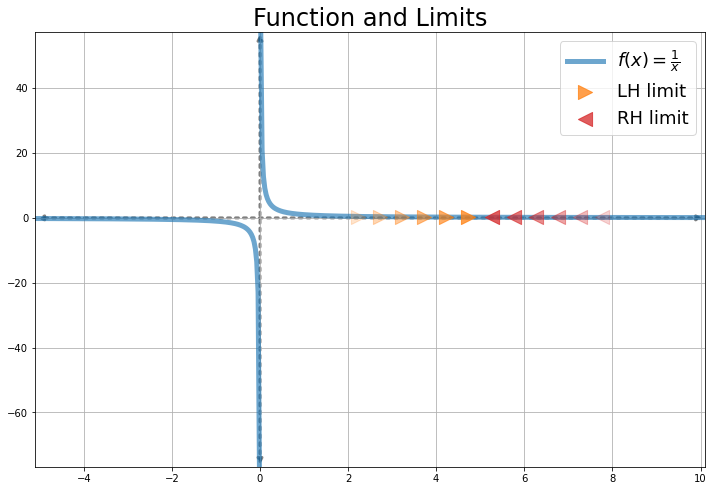

In [5]:

md(r'''
---

## Hands-on with Limits

Let's do some practice. Consider the following function:

$$
f(x) = \frac{1}{x}
$$

Let's first graph the function to help us visualize.

''')


# define function

def plot_limit(f,                   # f(x) function
               f_latex='',             # latex string of function
               c = None,            # approaching value
               dpts = None,         # discontinuous x-values
               xbounds = (-10, 10), # x-bounds for plotting
               ycrop = False,       # crop y-bounds in plots
               size = 500           # sample size
              ):
    '''
    Plots function and marks the left/right hand limit.
    
    f : function
        f(x) to plot
        
    f_latex : str
        latex string of function (without $$) for labels
        
    c : numeric or +/- numpy.inf (default = None)
        approaching value x -> c
    
    dpts : numpy array
        array of discontinous points
    
    xbounds : tuple (default = (-5, 5))
        x figure limits
        
    ycrop : boolean (default = False)
        crop y figure limits
        
    size : int (default = 500)
        number of sample points for plotting
    '''

    lbound, ubound = xbounds

    # positive/negative range
    X = np.linspace(lbound-.1, ubound+.1, size)

    # split intervals on discontinous points
    if dpts:
        dpix = np.searchsorted(X, dpts) # discontinous indexes
        intervals = np.split(X, dpix)
    else:
        intervals = np.array([X])

    plt.figure(figsize=(12, 8))

    # plot function intervals
    for itv in intervals:
        lines = plt.plot(itv, f(itv), zorder=2, lw=5,
                 alpha=0.65, c=dcolors[0])

    # find limits
    if c != None:
        
        ix = np.searchsorted(X, c) # get index
        ix = min(max(ix, 1), X.size - 1) # validate index
        lc, rc = X[ix-1], X[ix] # left/right x-values
        
        # plot limit pointer
        dmax = 3
        for d in np.flip(np.arange(0, dmax, 0.5)):
            
            # formatting
            format_kw = dict(s=200, zorder=3, alpha=0.1+0.65*(1-(d/dmax)))

            # plot left hand limit
            lh_lim = plt.scatter(lc-d-0.25, f(lc-d), marker='>',
                                 c=dcolors[1],
                                 **format_kw)

            # plot right hand limit
            rh_lim = plt.scatter(rc+d+0.25, f(rc+d), marker='<',
                                 c=dcolors[3],
                                 **format_kw)

        # add to legend
        lines.extend([lh_lim, rh_lim])
    
    # figure limits
    Y = f(X)
    left, right = X.min(), X.max()
        
    # x-lim options
    if xbounds:
        plt.xlim(left, right)
    
    # y-lim options
    if ycrop:
        low, high = Y.min(), Y.max()
    else:
        low, high = plt.ylim()
        
    plt.ylim(low, high)

    # cartesian plane arrows
    arrowprops = dict(arrowstyle='<|-|>',
                      lw=3, alpha=0.5, ls='dotted', fill=True)

    plt.annotate('', xy = (left, 0), xytext = (right, 0),
                 arrowprops=arrowprops, zorder=1,
                 ha='center', va='center')

    plt.annotate('', xy = (0, low), xytext = (0, high),
                 arrowprops=arrowprops, zorder=1,
                 ha='center', va='center')

    # legend
    labels = [f'${f_latex}$', 'LH limit', 'RH limit']
    plt.legend(lines, labels, fontsize=18)
    
    plt.title('Function and Limits', fontsize=24)
    plt.grid()
    
    plt.show()


# plot limit
plot_limit(
    f=lambda x : 1 / x,
    f_latex = r'f(x) = \frac{1}{x}',
    c=5, dpts=[0], xbounds=(-5, 10),
    ycrop=True
)

---

### One-sided limits

Notation for one-handed limits.
* Right hand: $\lim_{x \to c^+} f(x)$
* Left hand: $\lim_{x \to c^+} f(x)$

**`Note`** The limit of a function exists if the `left-hand` and `right-hand limit` are equal:

$$
\lim_{x \to c^-} f(x) = \lim_{x \to c^+} f(x) = L \iff \lim_{x \to c} f(x) = L.
$$

Otherwise, the limit does not exist (DNE):

$$
\lim_{x \to c^-} f(x) \neq \lim_{x \to c^+} f(x) \iff \lim_{x \to c} f(x) = \text{DNE}.
$$

For example: 
$$
\begin{align*}
    & \lim_{x \to 0^-} \frac{1}{x} = -\infty \\
    & \lim_{x \to 0^+} \frac{1}{x} = +\infty \\
    & \lim_{x \to 0^-} \frac{1}{x} \neq \lim_{x \to 0^+} \frac{1}{x} \implies \lim_{x \to 0} \frac{1}{x} = \text{DNE}.
\end{align*}
$$

### Practice Examples

Now let's practice evaluating some limits. The answers are in the latex comments.


#### 🍰 Simple limits with $c$ approaching a finite value:
$$
\begin{align*}
    \\ & \lim_{x \to 5} \frac{2}{x} = \; ? % ans: \frac{2}{5}
    \\ & \lim_{x \to 5} \frac{2}{x + 5} = \; ? % ans: \frac{1}{5}
    \\ & \lim_{x \to 10} \frac{x - 5}{x + 5} = \; ? % ans: \frac{1}{3}
\end{align*}
$$

#### 🚀 With $c$ approaching $\pm \infty$:
$$
\begin{align*}
    \\ & \lim_{x \to \infty} \frac{10^{100}}{x} = \; ? % ans: 0
    \\ & \lim_{x \to -\infty} \frac{420}{x} = \; ? % ans: 0
    \\ & \lim_{x \to 0} \frac{1}{x^2} = \; ? % ans: \infty
\end{align*}
$$

#### 🔔 Some bells and whistles:
$$
\begin{align*}
    \\ & \lim_{x \to \infty} \frac{x + 100}{x} = \; ?  % ans: \infty
    \\ & \lim_{x \to \infty} \frac{2x + 10^{100}}{x} = \; ?  % ans: 2
    \\ & \lim_{x \to -\infty} \frac{x^2 + 100}{x} = \; ? % ans: -\infty
    \\ & \lim_{x \to 0} \frac{x^2 + 100}{x^2} = \; ? % ans: \infty
    \\ & \lim_{x \to \infty} \frac{e^{x}}{x^3} = \; ? % ans: \infty
    \\ & \lim_{x \to \infty} \frac{x^3}{e^{x}} = \; ? % ans: 0
\end{align*}
$$

#### 🔥 Some spicy ones:
$$
\begin{align*}
    \\ & \lim_{x \to 0} \frac{1}{x} = \; ? % ans: DNE
    \\ & \lim_{x \to 5} \frac{2x}{x - 5} = \; ? % ans: DNE
    \\ & \lim_{x \to \infty} \frac{\sin(x)}{x} = \; ? % ans: 0
    \\ & \lim_{x \to -\infty} \frac{x^4 - 2x^3 + 3x^2 - 4x + 500}{100 + 2x^2 - 3x^3 + 4x^4 - 5x^5} = \; ? % ans: 0
    \\ & \lim_{x \to -\infty} \frac{x^4 - x^2 + x - 100}{100 + x^2 - x^3 + 3x^4} = \; ? % ans: \frac{1}{3}
    \\ & \lim_{x \to 0} \frac{x^4 - x^2 + x - 100}{100 + x^2 - x^3 + 3x^4} = \; ? % ans: -1
\end{align*}
$$

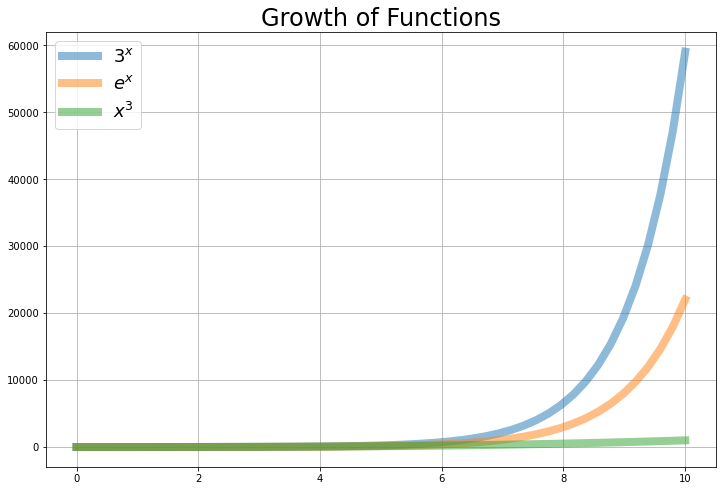

In [6]:
# compare growth rate of different functions

X = np.linspace(0, 10)

plt.figure(figsize=(12, 8))

# formatting
format_kw = dict(alpha=0.5, lw=8)

# plot
plt.plot(X, 3**X, **format_kw, label='$3^x$')

plt.plot(X, np.exp(X), **format_kw, label='$e^x$')

plt.plot(X, X**3, **format_kw, label='$x^3$')

# title
plt.title('Growth of Functions', fontsize=24)

plt.legend(fontsize=18)
plt.grid()

plt.show()